In [30]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [31]:
import warnings
warnings.filterwarnings('ignore')

### Extract, transform and analysis of datasets

Read output files extracted via SQL queries

In [32]:
city_list = pd.read_csv('./data/city_list.csv')
city_data = pd.read_csv('./data/city_data.csv')
global_data = pd.read_csv('./data/global_data.csv')

Check which cities of Spain have data

In [33]:
city_list[city_list.country=='Spain']

,city,country
33,Barcelona,Spain
184,Madrid,Spain
320,Valencia,Spain


Drop rows with null values

In [34]:
cleaned_city_data = city_data.dropna(inplace=False)
cleaned_global_data = global_data.dropna(inplace=False)

Filter city level data for Madrid city

In [35]:
madrid_data_w_moving_average = cleaned_city_data[cleaned_city_data.city=='Madrid']

Calculate 10-years moving average for Madrid data

In [36]:
madrid_data_w_moving_average['ten_years_moving_average'] = madrid_data_w_moving_average.iloc[:,3].rolling(window=10).mean()
madrid_data_w_moving_average['location'] = madrid_data_w_moving_average['city']
madrid_data_w_moving_average.drop(columns=['city','country'], inplace=True)
madrid_data_w_moving_average.head(n=11)

,year,avg_temp,ten_years_moving_average,location
37901,1743,6.65,NaN,Madrid
37902,1744,12.41,NaN,Madrid
37903,1745,5.46,NaN,Madrid
37908,1750,12.01,NaN,Madrid
37909,1751,12.71,NaN,Madrid
37910,1752,7.07,NaN,Madrid
37911,1753,11.47,NaN,Madrid
37912,1754,11.49,NaN,Madrid
37913,1755,11.17,NaN,Madrid
37914,1756,11.50,10.194,Madrid


Calculate 10-years moving average for Global data

In [53]:
global_data_w_moving_average = cleaned_global_data
global_data_w_moving_average['ten_years_moving_average'] = global_data_w_moving_average.iloc[:,1].rolling(window=10).mean()
global_data_w_moving_average['location'] = 'Global'
global_data_w_moving_average.head(n=11)

,year,avg_temp,ten_years_moving_average,location
0,1750,8.72,NaN,Global
1,1751,7.98,NaN,Global
2,1752,5.78,NaN,Global
3,1753,8.39,NaN,Global
4,1754,8.47,NaN,Global
5,1755,8.36,NaN,Global
6,1756,8.85,NaN,Global
7,1757,9.02,NaN,Global
8,1758,6.74,NaN,Global
9,1759,7.99,8.030,Global


Union Madrid and Global data in a unique Dataframe

In [38]:
madrid_and_global_temp = pd.concat([madrid_data_w_moving_average, global_data_w_moving_average])

Pivot Madrid and Global data

In [39]:
madrid_and_global_temp_pvt = madrid_and_global_temp.pivot(index='year', columns='location', values='ten_years_moving_average')

### Local and global temperature trends 

Plot Local and global temperature trends based on 10-years moving average temperature

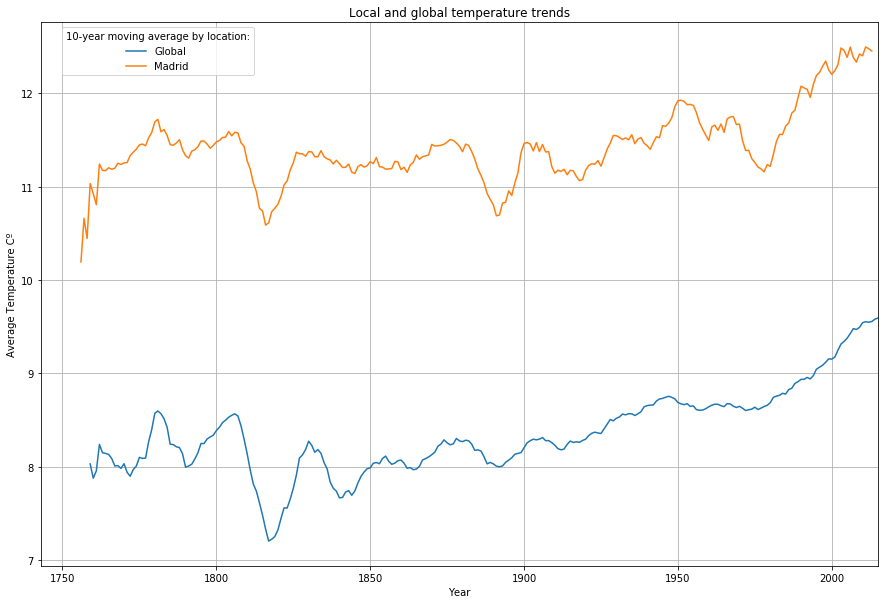

In [40]:
madrid_and_global_temp_plot = madrid_and_global_temp_pvt.plot(grid=True, figsize=[15,10], title='Local and global temperature trends')
madrid_and_global_temp_plot.set_xlabel('Year')
madrid_and_global_temp_plot.set_ylabel('Average Temperature Cº')
madrid_and_global_temp_plot.legend(title='10-year moving average by location:',bbox_to_anchor=(0.26, 1), fancybox=True)

Analyze specific years of 10-years moving average temperature for Madrid and Global data

In [41]:
madrid_and_global_temp[(madrid_and_global_temp.year>=1814) & (madrid_and_global_temp.year<=1823)]

,year,avg_temp,ten_years_moving_average,location
37972,1814,10.26,10.768,Madrid
37973,1815,10.85,10.743,Madrid
37974,1816,10.20,10.589,Madrid
37975,1817,11.37,10.613,Madrid
37976,1818,11.67,10.733,Madrid
37977,1819,11.02,10.770,Madrid
37978,1820,10.83,10.813,Madrid
37979,1821,11.67,10.896,Madrid
37980,1822,11.67,11.020,Madrid
37981,1823,11.08,11.062,Madrid


In [42]:
madrid_and_global_temp[(madrid_and_global_temp.year==1975) | (madrid_and_global_temp.year==2013)]

,year,avg_temp,ten_years_moving_average,location
38133,1975,11.14,11.260,Madrid
38171,2013,12.68,12.456,Madrid
225,1975,8.74,8.638,Global
263,2013,9.61,9.556,Global


Save 'Local and Global Temperature Trends' line chart as image

In [43]:
madrid_and_global_temp_plot.get_figure().savefig('./images/madrid_and_global_temperature_trends.png')

### Correlation Coefficient between Madrid and Global average temperature

Calculate Pearson's correlation coefficient 

In [44]:
madrid_and_global_temp_corr = madrid_and_global_temp_pvt.corr(method ='pearson')
madrid_and_global_temp_corr

location,Global,Madrid
location,,
Global,1.000000,0.879192
Madrid,0.879192,1.000000


Plot Pearson's Correlation between Madrid and Global 10-years moving average temperature

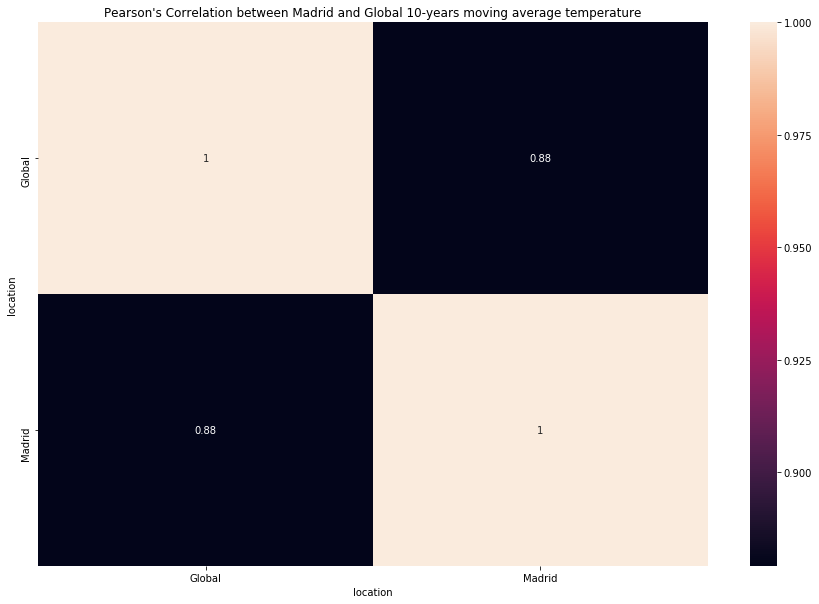

In [45]:
plt.figure(figsize=(15, 10))
ax = plt.axes()
madrid_global_corr_plot = sn.heatmap(madrid_and_global_temp_corr, annot=True, ax=ax)
ax.set_title("Pearson's Correlation between Madrid and Global 10-years moving average temperature")
plt.show()

Save 'Correlation between Madrid and Global 10-years moving average temperature' line chart as image

In [46]:
madrid_global_corr_fig = madrid_global_corr_plot.get_figure()
madrid_global_corr_fig.savefig('./images/Correlation_Madrid_Global_temp.png')

### Temperature trends of the most populated European Cities

Drop country column

In [47]:
local_data_w_moving_avg_temp = cleaned_city_data.drop(columns=['country'], inplace=False)

Calculate 10-years moving average temperature for every city of the city level data dataset

In [48]:
local_data_w_moving_avg_temp['ten_years_moving_average']= local_data_w_moving_avg_temp.groupby('city')['avg_temp'].transform(lambda x: x.rolling(window=10).mean())
local_data_w_moving_avg_temp.head()

,year,city,avg_temp,ten_years_moving_average
0,1849,Abidjan,25.58,NaN
1,1850,Abidjan,25.52,NaN
2,1851,Abidjan,25.67,NaN
7,1856,Abidjan,26.28,NaN
8,1857,Abidjan,25.17,NaN


Filter to keep only data of the top 5 most populated European capital in the 21st Century

In [49]:
european_capitals_data_w_moving_average = local_data_w_moving_avg_temp[(local_data_w_moving_avg_temp['city'].isin(['Madrid',"London","Berlin", 'Moscow', 'Kiev'])) & (local_data_w_moving_avg_temp['year']>=1900)].drop(columns=['avg_temp'], inplace=False)
european_capitals_data_w_moving_average.head(n=10)

,year,city,ten_years_moving_average
9147,1900,Berlin,8.730
9148,1901,Berlin,8.740
9149,1902,Berlin,8.675
9150,1903,Berlin,8.753
9151,1904,Berlin,8.772
9152,1905,Berlin,8.834
9153,1906,Berlin,8.908
9154,1907,Berlin,8.891
9155,1908,Berlin,8.784
9156,1909,Berlin,8.704


Pivot the Most Populated European Capitals temperature trends

In [50]:
european_capitals_data_w_moving_average_pvt = european_capitals_data_w_moving_average.pivot_table(index='year', columns='city', values='ten_years_moving_average')

Plot Temperature trends of the Most Populated European Capitals based on 10-years moving average temperature

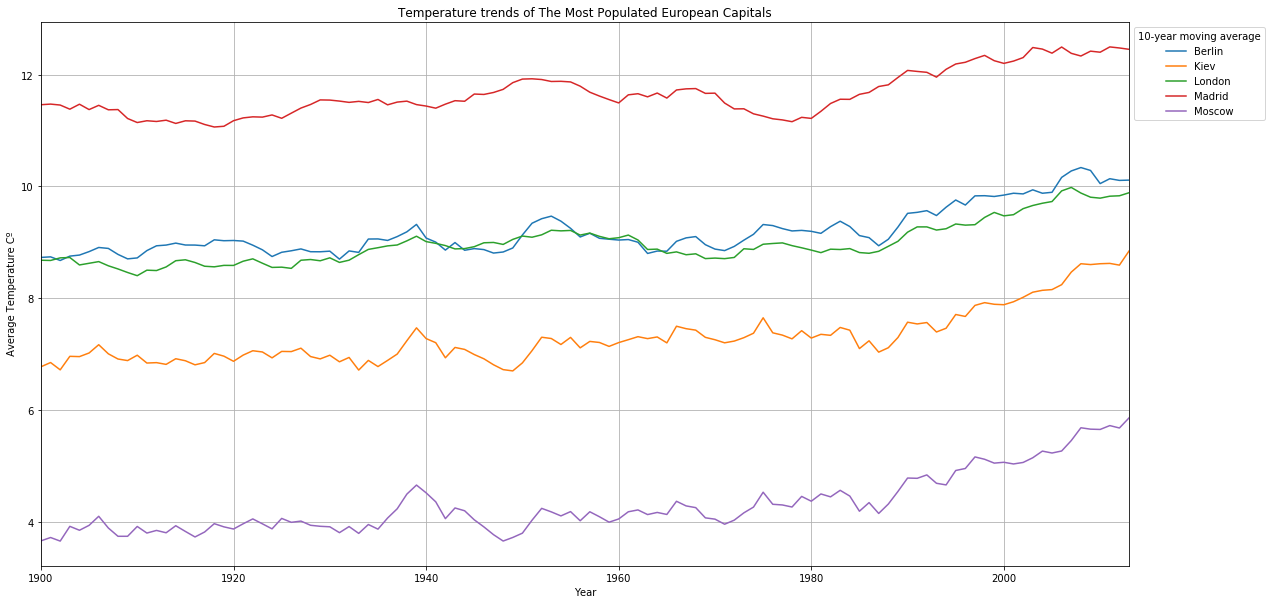

In [51]:

european_capitals_data_w_moving_average_temp_plot =european_capitals_data_w_moving_average_pvt.plot(grid=True, figsize=[19.5,10], title='Temperature trends of The Most Populated European Capitals')
european_capitals_data_w_moving_average_temp_plot.set_xlabel('Year')
european_capitals_data_w_moving_average_temp_plot.set_ylabel(' Average Temperature Cº')
european_capitals_data_w_moving_average_temp_plot.legend(title='10-year moving average',bbox_to_anchor=(1.0, 1.0), fancybox=True)

Save 'Temperature trends of The Most Populated European Capitals' line chart as image

In [52]:
european_capitals_data_w_moving_average_temp_plot.get_figure().savefig('./images/european_cities_temperature_trends.png')